In [1]:
import pandas as pd
from OpenMeteograms import *

In [2]:
locations = nominatim('mondariz')

0 Mondariz, Condado, Pontevedra, Galicia, España
1 Mondariz, Condado, Pontevedra, Galicia, España


In [3]:
index = 0
location = Place(locations[index])
location.__dict__

Error 404: {"error":["Product opencharts_meteogram not available --> ('base_time 2025-06-30T00:00:00Z (202506300000) is not available', \"Current available base_time ['2025-06-29T12:00:00Z', '2025-06-29T00:00:00Z', '2025-06-28T12:00:00Z', '2025-06-28T00:00:00Z', '2025-06-27T12:00:00Z', '2025-06-27T00:00:00Z', '2025-06-26T12:00:00Z', '2025-06-26T00:00:00Z', '2025-06-25T12:00:00Z', '2025-06-25T00:00:00Z', '2025-06-24T12:00:00Z', '2025-06-24T00:00:00Z', '2025-06-23T12:00:00Z', '2025-06-23T00:00:00Z', '2025-06-22T12:00:00Z', '2025-06-22T00:00:00Z', '2025-06-21T12:00:00Z', '2025-06-21T00:00:00Z', '2025-06-20T12:00:00Z', '2025-06-20T00:00:00Z', '2025-06-19T12:00:00Z']\")"],"tracker":"tracker-412afabfbb19438f9f90768156c3c963","uid":""}


{'properties': {'name': 'Mondariz',
  'type': 'city',
  'city': None,
  'county': 'Pontevedra',
  'state': 'Galicia',
  'country': 'España',
  'country_code': 'es'},
 'name': 'Mondariz',
 'lon': -8.4548756,
 'lat': 42.2329417,
 'elev': 118,
 'map': 'https://www.google.com/maps/@?api=1&map_action=map&basemap=satellite&center=42.2329417%2C-8.4548756',
 'tzinfo': <DstTzInfo 'Europe/Madrid' LMT-1 day, 23:45:00 STD>,
 'delta_time': 0,
 'meteo': {'windy': 'https://www.windy.com/42.2329417/-8.4548756/wind?42.2329417,-8.4548756,10',
  'meteoblue': 'https://www.meteoblue.com/es/tiempo/pronostico/multimodelensemble/42.2329417N-8.4548756E',
  'ecmwf-meteogram': None}}

In [4]:
fechas = ['2025-06-30', '2025-07-04']
modelos = ['IFS','AROME']

mondariz_meteo = MeteoSfc(location, fechas)
mondariz_meteo.get_data_models(modelos)

,time,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,wind_direction_10m,wind_gusts_10m,is_day,wind_direction_arrow,fuel_moisture,prob_ignition,model
0,2025-06-30 00:00:00,20.0,95.0,19.2,3.0,284.0,11.2,0,$\rightarrow$,25.0,10.0,IFS
1,2025-06-30 01:00:00,19.6,97.0,19.1,3.6,225.0,10.4,0,$\nearrow$,25.0,10.0,IFS
2,2025-06-30 02:00:00,19.3,98.0,19.0,4.5,209.0,10.1,0,$\nearrow$,25.0,10.0,IFS
3,2025-06-30 03:00:00,19.0,99.0,18.9,2.9,210.0,9.4,0,$\nearrow$,25.0,10.0,IFS
4,2025-06-30 04:00:00,18.9,99.0,18.7,0.8,333.0,8.3,0,$\searrow$,25.0,10.0,IFS
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2025-07-04 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,AROME
236,2025-07-04 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,AROME
237,2025-07-04 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,AROME
238,2025-07-04 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,AROME


In [5]:
mondariz_meteo.get_data_models(['ICON'])
mondariz_meteo.datos.model.unique()

array(['IFS', 'AROME', 'ICON'], dtype=object)

In [6]:
mondariz_meteo.get_data_years([2024, 2023, 2022])
mondariz_meteo.datos

,time,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,wind_direction_10m,wind_gusts_10m,is_day,wind_direction_arrow,fuel_moisture,prob_ignition,model
0,2025-06-30 00:00:00,20.0,95.0,19.2,3.0,284.0,11.2,0,$\rightarrow$,25.0,10.0,IFS
1,2025-06-30 01:00:00,19.6,97.0,19.1,3.6,225.0,10.4,0,$\nearrow$,25.0,10.0,IFS
2,2025-06-30 02:00:00,19.3,98.0,19.0,4.5,209.0,10.1,0,$\nearrow$,25.0,10.0,IFS
3,2025-06-30 03:00:00,19.0,99.0,18.9,2.9,210.0,9.4,0,$\nearrow$,25.0,10.0,IFS
4,2025-06-30 04:00:00,18.9,99.0,18.7,0.8,333.0,8.3,0,$\searrow$,25.0,10.0,IFS
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2025-07-04 19:00:00,24.0,66.0,17.3,12.7,348.0,22.3,1,$\downarrow$,8.0,40.0,2022
716,2025-07-04 20:00:00,23.0,71.0,17.6,15.7,355.0,20.2,1,$\downarrow$,9.0,40.0,2022
717,2025-07-04 21:00:00,22.7,72.0,17.5,17.3,3.0,26.3,1,$\downarrow$,9.0,40.0,2022
718,2025-07-04 22:00:00,21.9,74.0,17.1,18.6,14.0,29.2,1,$\downarrow$,10.0,30.0,2022


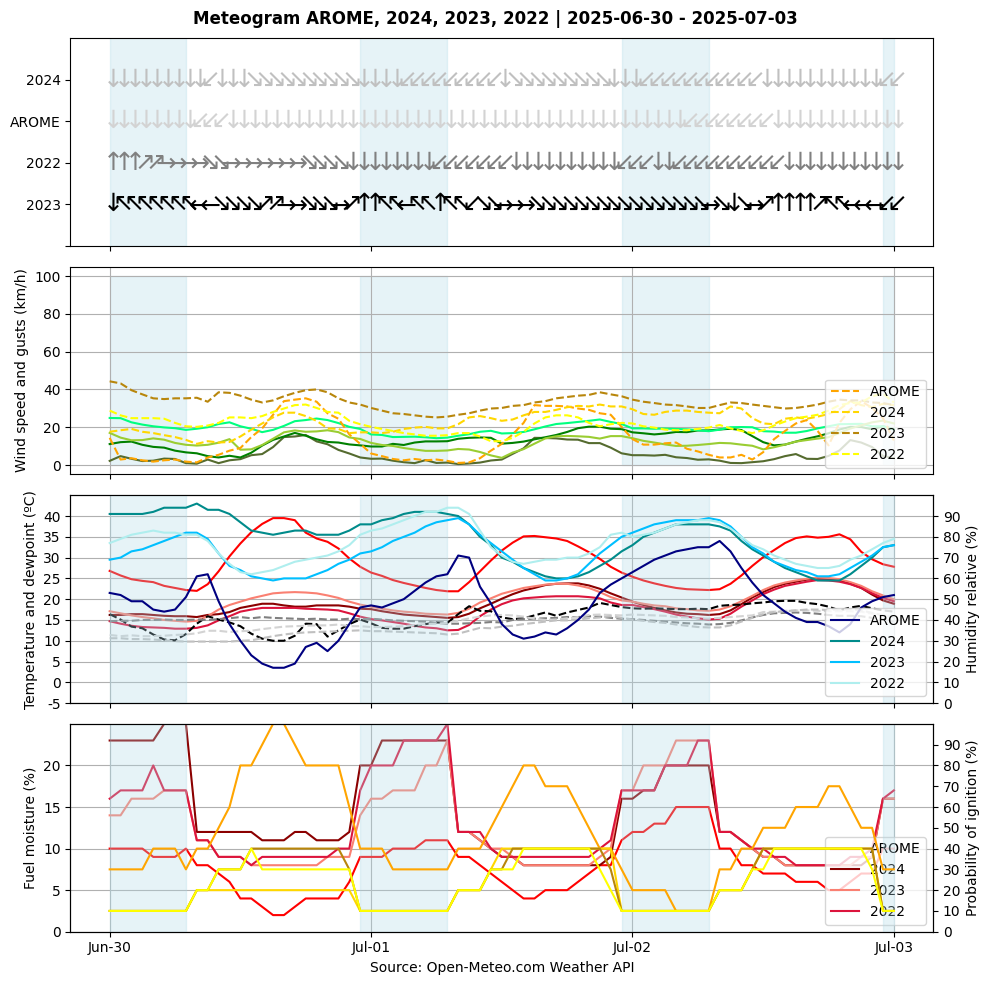

In [8]:
fig = mondariz_meteo.meteoplot( fechas= ['2025-06-30','2025-07-03'], models=['2023','2022', 'AROME','2024'])